# Medidas de Dispersão

A média (tendência central) releva algo importante sobre os dados, mas geralmente mais informação é necessária para descrever bem os dados.
A média pode ser injusta
Ex.: se Lucas comner um frango e Pedro passar fome, na média ambos almoçaram :/ 

Além das medidas de tendência, podemos extrair de um conjunto de dados medidas de dispersão.

## Variância e Desvio Padrão

### Varância

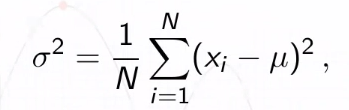
- Note que entro no pareteses, estamos centralizando os dados, valor atual do atributo - a média dos valores desse  atributo

- Outra forma de calcular np.cov()

|  |     Frango problema |  |  |
|-|-|-|-|
| Lucas | Pedro | Média | Variancia |
| 1 | 0 | 0.5 | 0.25 |
| 0.51 | 0.49 | 0.5 | 0.0001 |

O grau de disperção é muito maior na primeira situação do que no segundo

### Desvio Padrão

A raiz quadrada da variancia é chamada de desvio padrão e é denotado por: 

Desvio padrão (DP) é mais utilizado pois está na mesma unidade dos dados.

Ex.: se eu fizer a variancia dos pesos das pessoas, vai sair km^2, usando o DP vai sair realmente em km e fica mais fácil interpretar

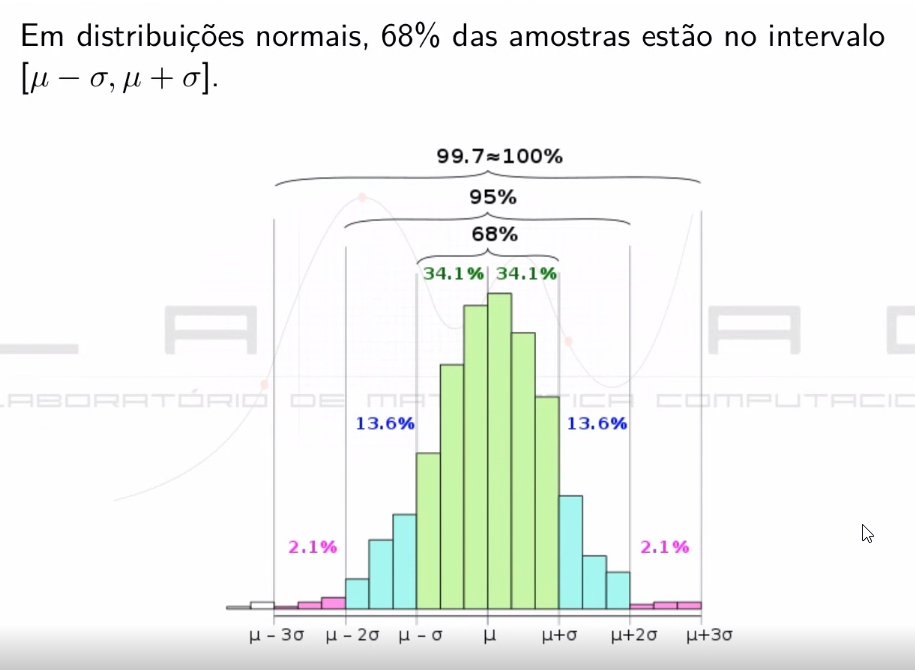

Consideremos as notas finais de duas turmas diferentes da UECE:

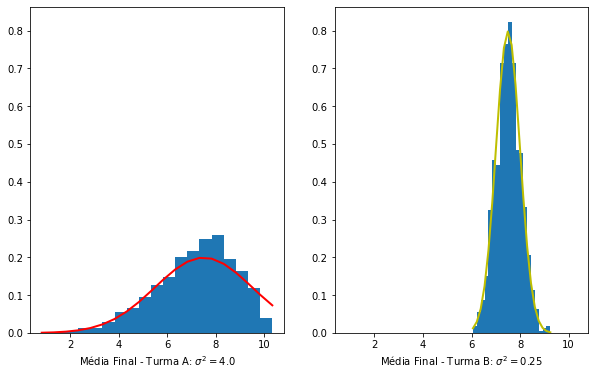

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

N = 1000
binwidth = 0.5
lower, upper = 0.0, 10.0

# Turma A
mu, sigma = 7.5, 2.0
A = stats.truncnorm.rvs((lower - mu)/sigma, (upper - mu)/sigma, loc=mu, scale=sigma, size=N)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
count, histA, ignored = plt.hist(A, bins=np.arange(min(A), max(A) + binwidth, binwidth), density=True)
plt.plot(histA, 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(histA - mu)**2/(2*sigma**2)), linewidth=2, color='r')
ax1.set_xlabel('Média Final - Turma A: $\sigma^2 = 4.0$')

# Turma B
mu, sigma = 7.5, 0.5
B = stats.truncnorm.rvs((lower - mu)/sigma, (upper - mu)/sigma, loc=mu, scale=sigma, size=N)

ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1)
count, histB, ignored = plt.hist(B, bins=20, density=True)
plt.plot(histB, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (histB - mu)**2 / (2 * sigma**2) ), linewidth=2, color='y')
ax2.set_xlabel('Média Final - Turma B: $\sigma^2 = 0.25$')

plt.show()

A qual das turmas você prefereria pertencer?

A variância fornece uma medida de dispersão dos dados: quanto maior a variância, mais dispersos são os dados.

Nos exemplos acima, vejamos as percentagens de alunos nos intervalos:

In [2]:
muA = np.mean(A)
sigmaA = np.std(A)
low = muA - sigmaA
high = muA + sigmaA
count = A[(A >= low) & (A <= high)].size
print('Alunos com notas no intervalo 1-sigma  [{:.1f},{:.1f}] : {} alunos ({:.1f} %)'
      .format(low,high,count,100.0*count/N))

low = muA - 2*sigmaA
high = muA + 2*sigmaA
count = A[(A >= low) & (A <= high)].size
print('Alunos com notas no intervalo 2-sigmas [{:.1f},{:.1f}]: {} alunos ({:.1f} %)'
      .format(low,high,count,100.0*count/N))

low = muA - 3*sigmaA
high = muA + 3*sigmaA
count = A[(A >= low) & (A <= high)].size
print('Alunos com notas no intervalo 3-sigmas [{:.1f},{:.1f}]: {} alunos ({:.1f} %)'
      .format(low,high,count,100.0*count/N))

Alunos com notas no intervalo 1-sigma  [5.6,8.8] : 674 alunos (67.4 %)
Alunos com notas no intervalo 2-sigmas [3.9,10.4]: 963 alunos (96.3 %)
Alunos com notas no intervalo 3-sigmas [2.3,12.1]: 996 alunos (99.6 %)


## Duas Variáveis Aleatórias

Analisemos um conjunto de dados com duas variáveis aleatórias.

Durante 12 dias, um sorveteiro anotou a temperatura média ($X_1$) do dia e o lucro obtido ($X_2$) com a venda de sorvetes:

In [3]:
X = np.array(
[[14.2 , 215],
[16.4 , 325],
[11.9 , 185],
[15.2 , 332],
[18.5 , 406],
[22.1 , 522],
[19.4 , 412],
[25.1 , 614],
[23.4 , 544],
[18.1 , 421],
[22.6 , 445],
[17.2 , 408]])

print(X)

[[ 14.2 215. ]
 [ 16.4 325. ]
 [ 11.9 185. ]
 [ 15.2 332. ]
 [ 18.5 406. ]
 [ 22.1 522. ]
 [ 19.4 412. ]
 [ 25.1 614. ]
 [ 23.4 544. ]
 [ 18.1 421. ]
 [ 22.6 445. ]
 [ 17.2 408. ]]


As médias e as variâncias são, respectivamente:

In [4]:
mu = np.mean(X, axis=0)
#np.set_printoptions(precision=2)
print('Médias: mu = ', mu)

Médias: mu =  [ 18.675      402.41666667]


In [7]:
sigma2 = np.var(X, axis=0)
print('Variâncias : sigma2 = ', sigma2)

Variâncias : sigma2 =  [   14.74854167 14562.90972222]


Por fim, calculamos a covariância:

In [8]:
Sigma = np.cov(X, rowvar=False, bias=True) # bias faz a divisão por N (True) ou N-1 (False)
print('Covariância: Sigma =\n', Sigma)

Covariância: Sigma =
 [[   14.74854167   443.75208333]
 [  443.75208333 14562.90972222]]


Note que np.cov calcula a matriz de covariância.<br>
A covariância $\sigma_{12}$ é:

In [7]:
print('sigma12 =', Sigma[0,1])

sigma12 = 443.7520833333334


Vejamos como os dados estão espcialmente distribuídos.

[ 18.675      402.41666667]


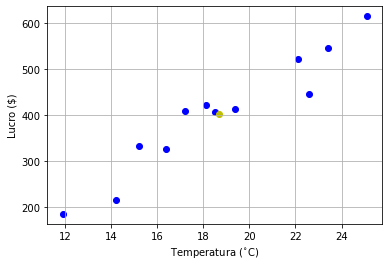

In [8]:
centroid = np.sum(X, axis=0)/len(X)
print(centroid)
plt.scatter(X[:,0],X[:,1],c='b')
plt.scatter(centroid[0],centroid[1],c='y')
plt.grid()
plt.xlabel('Temperatura ($^{\circ}$C)')
plt.ylabel('Lucro ($)')
plt.show()

## Padronização Estatística dos Dados

Podemos centralizar os dados, fazendo:

$$
X_0 = X - \mu \, .
$$

Podemos ainda padronizar os dados, usando:<br>
$$
 Z = \frac{X - \mu}{\sigma} \, .
$$

Correlação:
 P = [[1.         0.95750662]
 [0.95750662 1.        ]]
centroide: [-2.49800181e-16 -9.19403442e-17]


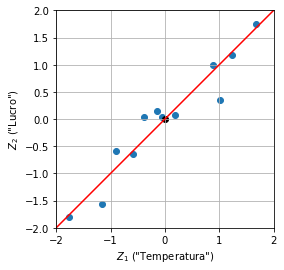

In [36]:
Z = (X - np.mean(X,axis=0)) / np.std(X, axis=0) 
print('Correlação:\n P =', np.cov(Z, rowvar=False, bias=True))
centroid = np.sum(Z, axis=0)/len(Z)
print('centroide:',centroid)

fig, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.scatter(Z[:,0],Z[:,1])
ax1.plot(np.linspace(-2.0, 2.0, 12), np.linspace(-2.0, 2.0, 12), c='r')
ax1.scatter(centroid[0],centroid[1],c='black')
ax1.set_xlim(left=-2.0, right=2.0)
ax1.set_ylim(bottom=-2.0, top=2.0)
ax1.set_xlabel('$Z_1$ ("Temperatura")')
ax1.set_ylabel('$Z_2$ ("Lucro")')
ax1.grid()
plt.show()